In [1]:
import pandas as pd
from lets_plot.plot import *
from lets_plot.plot import geom_livemap

# Exploring Minard's 1812 plot with lets-plot #

In [2]:
cities = pd.read_csv('data/cities.csv')
troops = pd.read_csv('data/troops.csv')
temps = pd.read_csv('data/temps.csv')


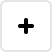
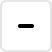
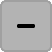
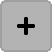
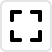
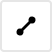
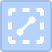

In [3]:
plot = ggplot(troops)

plot += geom_path(aes(x='long', y='lat', group='group', color='direction', size='survivors'))
plot += scale_size(range=(.5, 15))
plot += scale_color_manual(values=[ "#DFC17E", "#252523" ])

plot += geom_point(aes(x='long', y='lat'), data=cities, color='#BB0000')
plot += geom_text(aes(x='long', y='lat', label='city'), data=cities, vjust='top', color='#BB0000')

plot += labs(x='', y='')
plot += theme(legend_position='none')
plot += ggsize(800, 200)

plot

In [4]:
plot = ggplot(troops)

plot += geom_livemap(location=[23.5, 53.4, 38.1, 56.3])

plot += geom_path(aes(x='long', y='lat', group='group', color='direction', size='survivors'))
plot += scale_size(range=(.5, 15))
plot += scale_color_manual(values=[ '#DFC17E', '#252523' ])

plot += geom_point(aes(x='long', y='lat'), data=cities, color='red')

plot += labs(x='', y='')
plot += theme(legend_position='none')

plot

In [5]:
# Rude, but working properly version of the path

dfs = [ troops[i:(i + 2)] for i in range(troops.shape[0] - 2) ]
dfs = filter(lambda df: df['group'].iloc[0] == df['group'].iloc[1], dfs)

plot = ggplot()

MAX_SIZE = 15
for df in dfs:
    plot += geom_path(
        aes(x='long', y='lat', group='group', color='direction'),
        data=df,
        size=MAX_SIZE*df['survivors'].iloc[0]/troops['survivors'].max(),
        color=('#DFC17E' if df['direction'].iloc[0] == 'A' else '#252523')
    )

plot += geom_point(aes(x='long', y='lat'), data=cities, color='#BB0000')
plot += geom_text(aes(x='long', y='lat', label='city'), data=cities, vjust='top', color='#BB0000')

plot += labs(x='', y='')
plot += theme(legend_position='none')
plot += ggsize(800, 200)

plot